In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm

import host_galaxy_enhancement_plots as hostplot


In [2]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [3]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/new/'

In [4]:
brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']

In [5]:
TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_50_control = control.control_samples_TNG(TNG_50_pop)

processing each merger redshifts for controls: 100%|██████████| 80/80 [00:00<00:00, 413.93it/s]


Number of available mergers in this population is 420
Number of cases where a close enough match is not found within the acceptable tolerance: 28


In [6]:
simPath = brahma_basepath + brahma_simName_array[0] + '/'
brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 578.02it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 610.37it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654
SM5_TNG 8.521903056677352e-10


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 640.91it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526
SM5_LW10_TNG 8.602836895561992e-10


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 820.78it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400
SM5_LW10_LOWSPIN_TNG 1.0291245848788684e-09


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1194.90it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123
SM5_LW10_LOWSPIN_RICH_TNG 1.2541500027494895e-09


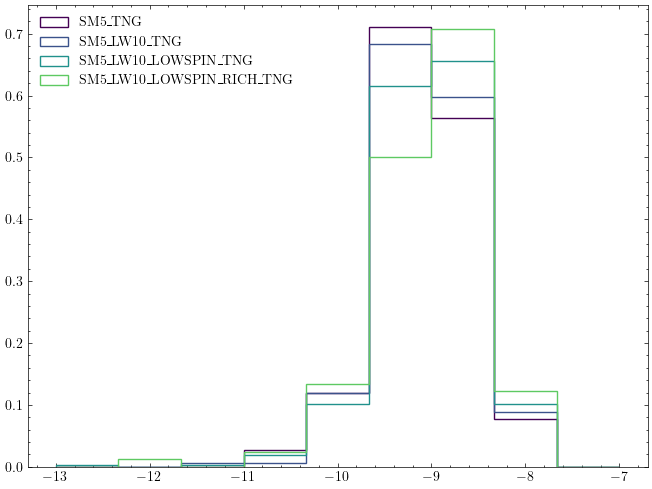

In [7]:
SFR_log_min = -13
SFR_log_max = -7
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,10)

fig,ax = plt.subplots(1,1,figsize=(8,6))

for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    SFR_mergers = brahma_control.sSFR_merging_pop
    print(sim,np.median(SFR_mergers[SFR_mergers>0]))
    ax.hist(np.log10(SFR_mergers[SFR_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=plt.cm.viridis(i/len(brahma_simName_array)))

ax.legend()

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 607.55it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 694.03it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 843.34it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1208.54it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123


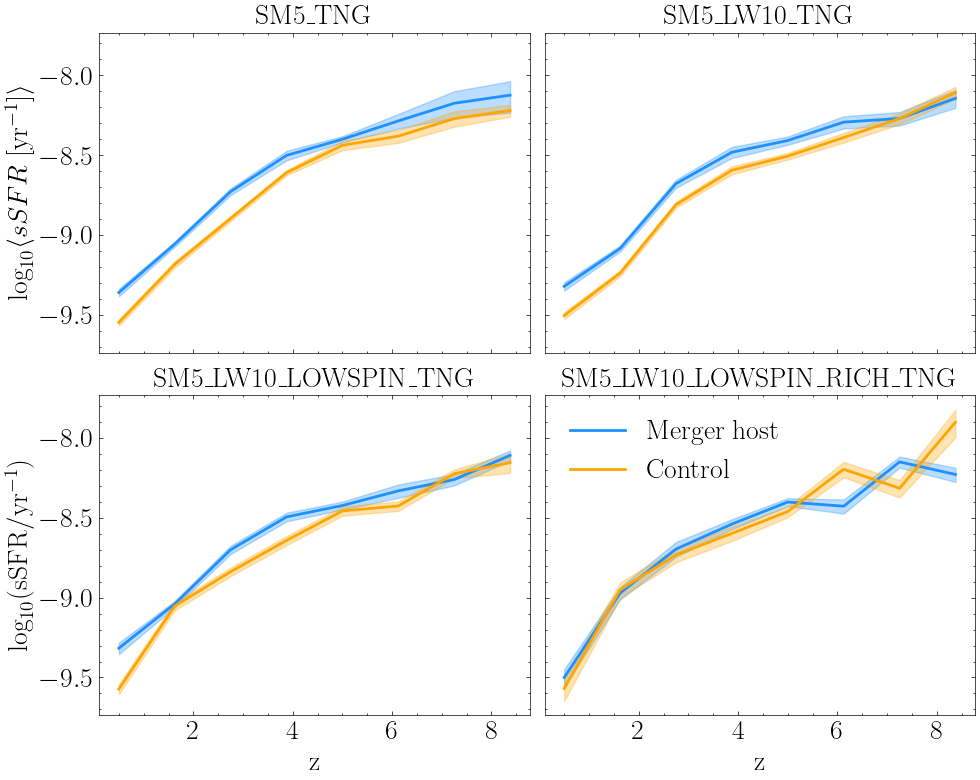

In [59]:
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    ax1 = hostplot.sSFR_evolution_comparison_plot(flattened_axes[i],brahma_control,z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_ylabel(r'$\log_{10}(\mathrm{sSFR/yr^{-1}})$')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()  
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles,labels,loc="upper right")

In [9]:
brahma_sim_colors = {brahma_simName_array[0]: 'C0', brahma_simName_array[1]: 'C1', brahma_simName_array[2]: 'C2', brahma_simName_array[3]: 'C3'}
brahma_sim_obj = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 586.73it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 682.21it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 853.17it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1220.08it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123


In [60]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,1)

In [61]:
z_bins_tng

array([0, 1, 2, 3])

In [62]:
hostplot.sSFR_enhancement_calculate(TNG_50_control,z_bins_tng)

(array([0.24456738, 0.3270462 , 0.22131177]),
 array([0.07333112, 0.05096686, 0.03408017]),
 array([0, 1, 2, 3]))

In [63]:
z_bins[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type

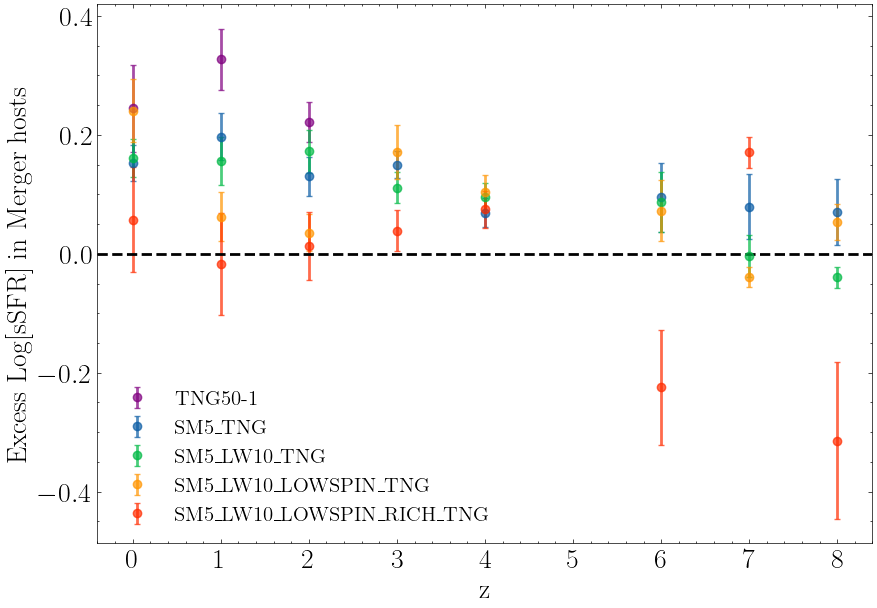

In [64]:
fig,ax = plt.subplots(1,1,figsize=(10,7))

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=25,ticksize=20,legendsize=15)
avg_sSFR_tng,std_sSFR_tng,z_bins_tng = hostplot.sSFR_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh,z_bins = hostplot.sSFR_enhancement_calculate(brahma_sim_obj[sim],z_bins)
    ax.errorbar(z_bins[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sSFR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()

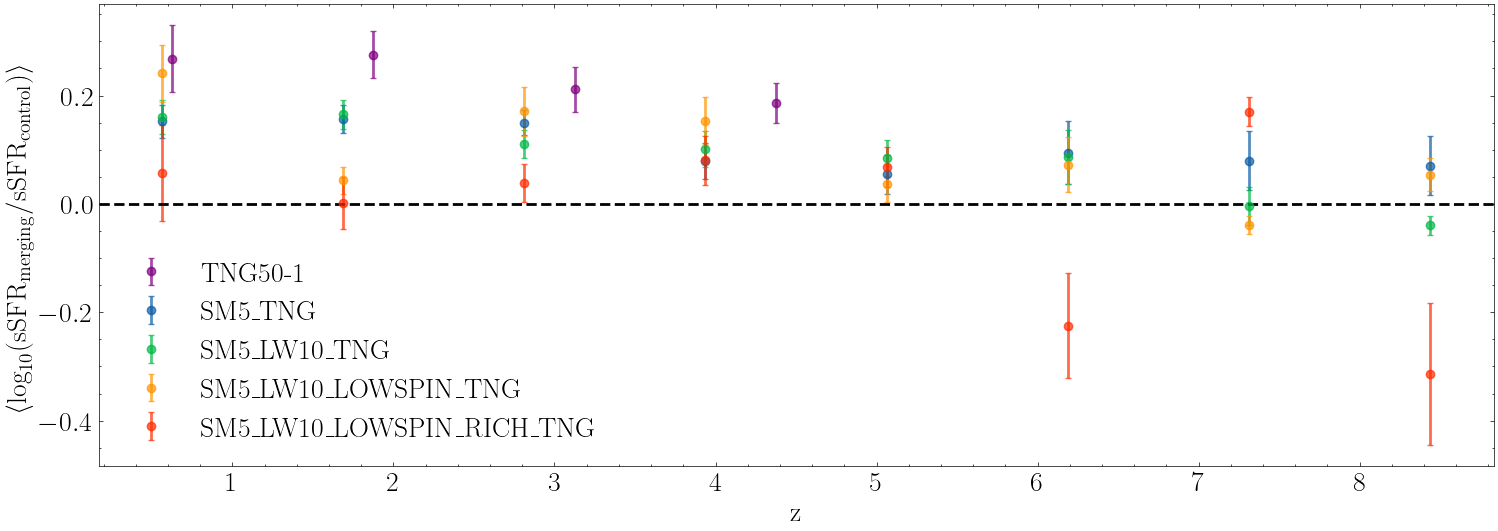

In [26]:
fig,ax = plt.subplots(1,1,figsize=(18,6))

avg_sSFR_tng,std_sSFR_tng,z_bins_tng = hostplot.sSFR_enhancement_calculate(TNG_50_control,z_min=0,z_max=5,z_binsize=1)
ax.errorbar(0.5*(z_bins_tng[1:]+z_bins_tng[:-1]),avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh,z_bins = hostplot.sSFR_enhancement_calculate(brahma_sim_obj[sim],z_min=0,z_max=9,z_binsize=1)
    ax.errorbar(0.5*(z_bins[1:]+z_bins[:-1]),avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel(r'$\langle \log_{10}(\mathrm{sSFR_{merging}}/\mathrm{sSFR_{control}})\rangle$')
ax.axhline(0,linestyle='--',color='k')
ax.legend()

processing each merger redshifts for controls:   0%|          | 0/16 [00:00<?, ?it/s]

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 618.17it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 694.58it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 840.69it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1124.58it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123


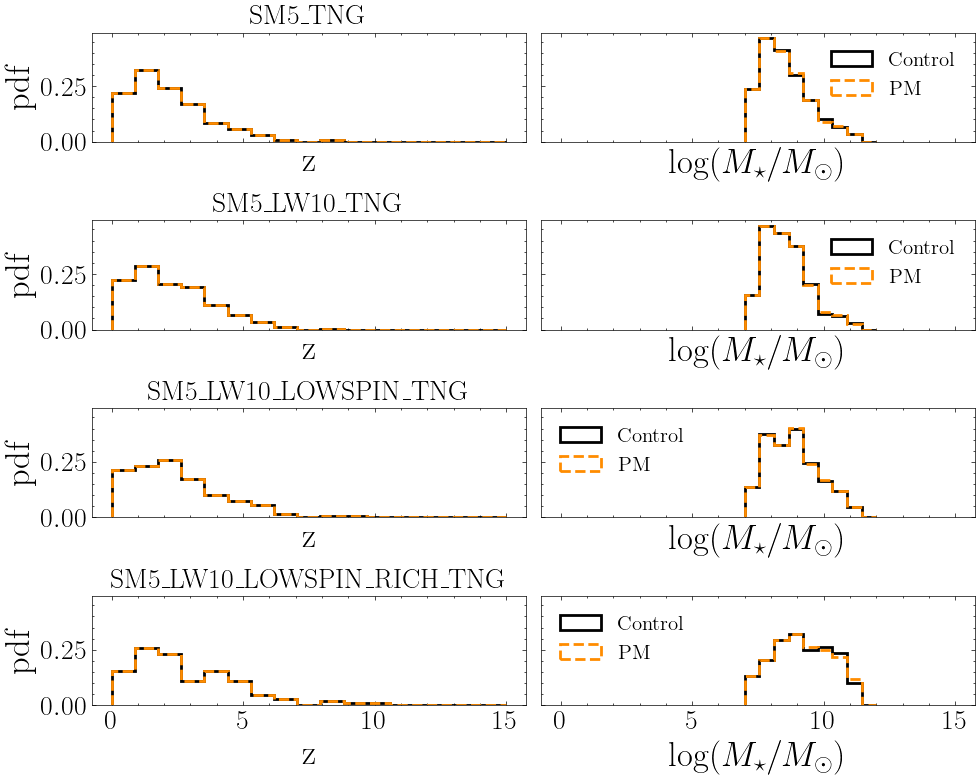

In [22]:
fig, axes = plt.subplots(4,2, figsize=(10,8),sharex=True,sharey=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    ax_plt = [axes[i][0],axes[i][1]]
    axes_plt = hostplot.match_z_Mstar_plot(ax_plt,brahma_control,Mstar_binsize = 0.5,Mstar_min = 7,Mstar_max = 12,z_binsize = 0.8,z_min = 0,z_max = 15)
    axes_plt[0].set_title(sim)

fig.tight_layout()

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 612.72it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654
SM5_TNG 4.161568999170691e-09


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 681.75it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526
SM5_LW10_TNG 4.222750150230914e-09


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 848.78it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400
SM5_LW10_LOWSPIN_TNG 3.970004784182998e-09


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1199.86it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123
SM5_LW10_LOWSPIN_RICH_TNG 6.258746677154414e-09


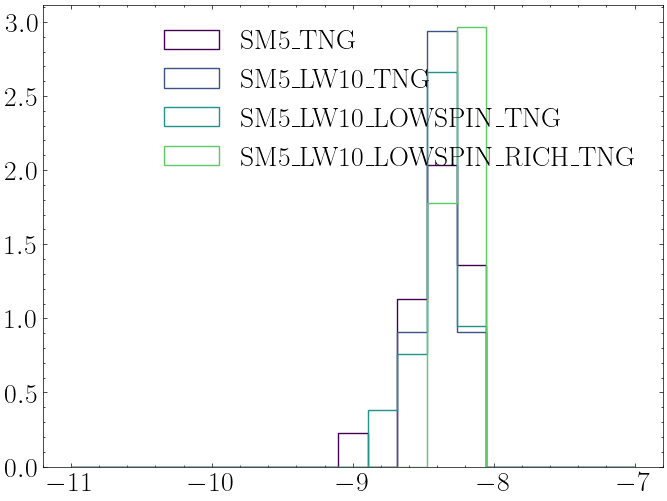

In [23]:
SFR_log_min = -11
SFR_log_max = -7
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,20)

fig,ax = plt.subplots(1,1,figsize=(8,6))
z_l = 6
z_u = 8

for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    sSFR_mergers = brahma_control.sSFR_control_pop
    z_mergers = brahma_control.z_control_pop
    z_indices = np.where((z_mergers>=z_l) & (z_mergers<z_u))
    sSFR_mergers = sSFR_mergers[z_indices]
    print(sim,np.median(sSFR_mergers[sSFR_mergers>0]))
    ax.hist(np.log10(sSFR_mergers[sSFR_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=plt.cm.viridis(i/len(brahma_simName_array)))

ax.legend()